6. Suppose you are operating a snack store. You would like to offer a promotion for the coming summer. Your idea for the promotion is bundling two snacks together and allow customers to buy two snacks at a time for the cost of one. Suppose there are 100000 snacks in your store. All snacks are indexed by a unique integer id ($0\leq id \leq 100000-1$). Assume that the price of each snack is uniformly distributed in $\{18, 19, 20, 21, 22\}$. The price of each snack is independent of each other.

**Part I:** Plot the pmf of the price of one snack as well as the pmf of the sum of the prices of two snacks. Hint: The distribution of the sum of two independent random variables is the convolution of the distributions of the two random variables. You may use numpy.convolve to obtain the pmf of the sum of the prices of two snacks. You may use stem plot.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

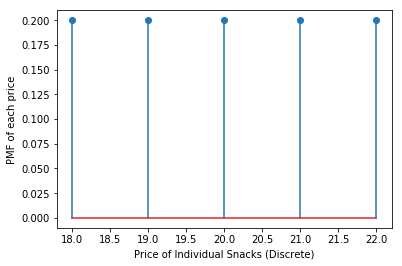

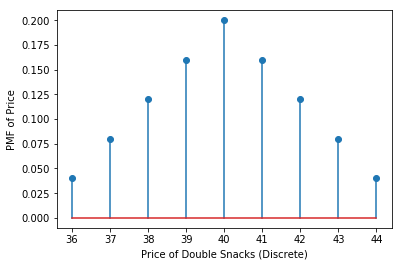

Probability for each price for double snacks:


array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.16, 0.12, 0.08, 0.04])

In [2]:
# Put your code to plot the pmf of the price of one snack as well as the pmf of the sum of the prices of two snacks here

x1 = np.arange(18,23, 1) #18 to 22 inclusively
y1 = scipy.stats.randint.pmf(x1, 18, 23)
plt.xlabel('Price of Individual Snacks (Discrete)')
plt.ylabel('PMF of each price')
plt.stem(x1, y1)
plt.show()

y2 = scipy.stats.randint.pmf(x1, 18, 23)
x = np.arange(36, 45, 1)
y = np.convolve(y1, y2)
plt.xlabel('Price of Double Snacks (Discrete)')
plt.ylabel('PMF of Price')
plt.stem(x, y)
plt.show()

print('Probability for each price for double snacks:')
y


**In order to reduce the cost, you decide that you will only bundle snacks if the sum of their prices is 39 or less. **

**Part II:** Suppose you pick two snacks at random and check the sum of their prices. 

**a:** Let $N$ be the number of snacks accessed in order to pick two snacks such that the sum of their prices is 39 or less. Identify the distribution of $N$ as a distribution known in class. Find the expected value of $N$.

**Your Answer:**

N should be geometrically distributed (pick snacks **until** we have 2 with the sum of 39 or less).


P (price<=39) = P(price = 36) + P(price = 37) + P(price = 38) + P(price = 39)

P (price<=39) = 0.04 + 0.08 + 0.12 + 0.16

P (price<=39) = 0.40

1-P           = 0.60 

Hence,

E[attempt] = 1/P (expected value for geometric distribution)

E[attempt] = 1/0.40

E[attempt] = 2.5

But for each attempt we take 2 snacks, therefore

E[N] = 2* E[attempt]

E[N] = 5

Expected value of N is 5

We define below a function called getSnack, that allows you access snacks by calling getSnack( index ). 

In [3]:
from __future__ import division
from numpy import random
import string

def getSnack( index ):
    if index >= 100000 or index < 0:
        return None
    random.seed( index )
    letter_nums = string.ascii_uppercase + string.digits 
    letter_nums = [letter for letter in letter_nums]
    my_id = ''.join(random.choice(letter_nums) for _ in range(20))
    my_price = scipy.stats.randint.rvs(18, 22+1)
    return {'id':my_id, 'price':my_price}

**b:** We have simulated the trials 10000 times and plot the empirical histogram of $N$ for you below. Compute an estimate of the expectation of $N$ and output the value. Plot the theoretical pmf of $N$, which can be generated using scipy.stats.geom.pmf(). Check your work by comparing the estimated expectation and theoretical pmf of $N$ with the expected value of $N$ in **a** and the empirical histogram.

Estimated expected value of N: 
4.8914


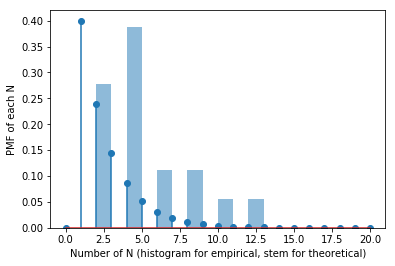

Compare with the value we obtained in part a


In [4]:
m = 10000 # number of times to simulate
total = 0 # initialize the total number of trails performed
pmf = [] # an empty array to be used to accomodate the number of snacks has been accessed
bins = np.arange(0,21,1)
for i in range(m):
    curr = 0
    while True:
        curr += 2
        id1 = random.randint(0,100000)
        id2 = random.randint(0,100000)
        while id1 == id2:
            id2 = random.randint(0,100000)
        if getSnack(id1)['price'] + getSnack(id2)['price'] <= 39:
            break
    pmf.append(curr)
    total += curr # total number of snacks has been accessed
plt.hist(pmf,bins,density = True,alpha = 0.5)

# put your code to compute the estimate of the expecation of N here
expectationEmpirical = 0
sum = 0
for i in range (m):
    sum += pmf[i]
expectationEmpirical = sum/m
print("Estimated expected value of N: ")
print(expectationEmpirical)

# put your code to plot the theoretical pmf of N here
theoreticalP = 0.4 #from number a
geom = scipy.stats.geom.pmf(bins, theoreticalP)
plt.xlabel('Number of N (histogram for empirical, stem for theoretical)')
plt.ylabel('PMF of each N')
plt.stem(bins, geom)
plt.show()
print("Compare with the value we obtained in part a")

**Part III:** One day later, you come up with another idea on picking snacks. Pick one snack at random, and see whether the price is less than or equal to 20. If it is, keep the snack, and search again to find another snack with price of 19 or less.

**a:** Let $M$ be the number of snacks accessed in order to pick two snacks such that the sum of their prices is 39 or less. Find the expected value of $M$.

**Your Answer:** 

Available snack price = {18,19,20,21,22}

A = event when first snack is less than or equal to 20 (18,19,20)

B = event when second snack is less than or equal to 19 (18,19)

P(total is 39 or less) = P(A, B)

P(total is 39 or less) = P(A) * P(B)

P(total is 39 or less) = 3/5 * 2/5

P(total is 39 or less) = 6/25 = 0.24

E[M] = (1/P) 

E[M] = 1/0.24

E[M] = 4.17 


**b:** We have simulated the trials 10000 times for you below. Compute an estimate of the expectation of $M$ and output the value.

In [6]:
m = 10000 # number of times to simulate event

total = 0
for i in range(m):
    curr = 0
    for j in range(2):
        while True:
            curr += 1
            id1 = random.randint(0,100000)
            if (j ==0 and getSnack(id1)['price'] <= 20):
                break
            elif (j== 1 and getSnack(id1)['price'] <= 19):
                break
    total += curr
# put your code to compute the estimate of the expecation of M here

expectationEmpirical2 = total/m
print("Estimated expected value of M: ")
print(expectationEmpirical2)

Estimated expected value of M: 
2.8331


**Part IV:** Which strategy should you use?

**Your Answer:**

Second strategy, less number of expected value of snacks taken.